___
# Ciência dos Dados - PROJETO 3 - INSPER

___
## Leonardo Bhering 

## Gustavo Molina

___

## INTRODUÇÃO

Este projeto tem como objetivo prever qual o valor de mercado de um jogador de futebol com base em algumas variaveis, como sua idade e seus números da temporada.

___
## MINERANDO DADOS e CARACTERÍSTICAS DO DATASET

[Detalhe aqui as características da base de dados além da análise descritiva.]

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from numpy import arange
from sklearn.model_selection import train_test_split
pd.options.mode.chained_assignment = None

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Gustavo\Downloads\cddp3-master


### BASE DE DADOS

In [3]:
dados = pd.read_excel('jogadores.xlsx')

In [4]:
dados.dtypes

Rank                                       int64
Jogador                                   object
Posição                                   object
Idade                                      int64
Valor de Mercado (em milhões de euros)     int64
Jogos                                      int64
Gols                                       int64
Assistencias                               int64
dtype: object

In [5]:
print('Base de dados com a qual trabalharemos:')
dados.head()

Base de dados com a qual trabalharemos:


,Rank,Jogador,Posição,Idade,Valor de Mercado (em milhões de euros),Jogos,Gols,Assistencias
0,1,Neymar,Extremo Esquerdo,26,180,32,29,19
1,2,Lionel Messi,Extremo Direito,30,180,55,45,18
2,3,Kylian Mbappé,Extremo Direito,19,120,50,23,19
3,4,Harry Kane,Ponta de Lança,24,120,48,41,5
4,5,Cristiano Ronaldo,Ponta de Lança,33,120,45,46,8


In [6]:
dados.columns = ['Rank','Jogador','posição','idade','valor','jogos','gols','assistencias']

In [7]:
dados_filtro = dados.iloc[0:,[2,3,4,5,6,7]]
dados_filtro.head()

,posição,idade,valor,jogos,gols,assistencias
0,Extremo Esquerdo,26,180,32,29,19
1,Extremo Direito,30,180,55,45,18
2,Extremo Direito,19,120,50,23,19
3,Ponta de Lança,24,120,48,41,5
4,Ponta de Lança,33,120,45,46,8


### ANÁLISE DESCRITIVA

In [8]:
#Dividindo a base de dados em 90% para treinamento e 10% para teste
treinamento, teste = train_test_split(dados_filtro, test_size=0.1)

In [9]:
teste.head()

,posição,idade,valor,jogos,gols,assistencias
74,Lateral Esquerdo,27,50,40,4,6
43,Extremo Esquerdo,26,60,44,19,9
192,Lateral Direito,22,25,42,1,4
78,Defesa Central,32,50,45,7,1
184,Médio Ofensivo,22,25,51,4,13


In [10]:
treinamento.head()

,posição,idade,valor,jogos,gols,assistencias
156,Defesa Central,22,30,37,0,2
122,Extremo Direito,20,35,44,9,12
13,Ponta de Lança,31,85,53,32,18
11,Ponta de Lança,29,90,50,42,5
168,Médio Ofensivo,30,30,40,3,7


___
## MODELOS DE PREDIÇÃO

[O tópico C.PROCESSO E ESTATÍSTICAS DE VALIDAÇÃO estará dentro deste tópico. Organize-o aqui de forma clara!]

[ORGANIZE AQUI TODOS OS MODELOS DE PREDIÇÃO NECESSÁRIOS NESTE PROJETO!]

o MODELO DE PREDIÇÃO PELA MÉDIA

o MODELO DOS K VIZINHOS MAIS PRÓXIMOS (K-Nearest Neighbors Regression)

o MODELO DE REGRESSÃO LINEAR (Multiple Linear Regression)

o MODELO DE ÁRVORES DE REGRESSÃO (Decision Tree Regression)

Modelo de Predição pela Média:

In [11]:
#Modelo de Predição pela média
#Achando a média dos valores de mercado de cada jogador
media=treinamento['valor'].mean()
print(media)

48.97222222222222


In [12]:
#Aplicando o R^2
valor = (teste['valor'] - media)**2
r2 = 1 - (valor.sum()/valor.sum())
r2

0.0

In [13]:
#Aplicando o RMS
rms = (valor.sum()/20)**0.5
rms

15.648950779327894

Modelo de Regressão Linear:

In [14]:
#Separar em variáveis independentes e a variável dependente
X = dados_filtro.iloc[0:,[0,1,3,4,5]].values #Variáveis independentes
y = dados_filtro.iloc[0:,2].values #Variável dependente (Valor do jogador)

In [15]:
#Codificação da variável posição (de string para float)
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X[:,0] = labelencoder_X.fit_transform(X[:,0])
onehotencoder = OneHotEncoder(categorical_features = [0])
X = onehotencoder.fit_transform(X).toarray()

In [16]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.1, random_state = 0)

In [17]:
#Aplicando a Regressão Linear Multipla noa base trenamento
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_treino, y_treino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
#Prevendo os resultados dos dados teste
y_pred = regressor.predict(X_teste)
y_pred

array([ 35.39064121,  35.4795506 ,  41.19645369,  44.30060816,
        42.75525974,  57.79411329,  63.17478808,  50.74069459,
        75.03398028,  52.3280977 ,  64.38758883,  39.91506359,
        49.12267669,  37.16136378,  44.01769797,  78.48187553,
        63.56390178,  43.7460045 ,  52.80041937,  45.06860621])

In [24]:
#Transformado o array(predição dos valores) e a coluna(teste['valor']) em lista
lista_y = y_pred.tolist()
lista_v = teste['valor'].tolist()
media2 = 0
for i in range(len(lista_v)):
    media2 = media2 +lista_v[i]
media_f = media2/20
lista_R = []
for j in range(len(lista_y)):
    R12 = (lista_v[j] - lista_y[j])**2
    lista_R.append(R12)
teste['valor_estipulado'] = lista_R

div_f0 = teste['valor_estipulado'].sum()

R2f = 1 - (div_f0/div_f1)
print('O valor de R2 na regressão linear é {0}'.format(R2f))
lista_F = []
for l in range(len(lista_v)):
    div1 = (lista_v[l] - media_f)**2
    lista_F.append(div1)
#Transformando a lista_F em uma coluna do dataframe teste
teste['valor_estipulado_media'] = lista_F
#Somando todos os valores da coluna do dataframe adicionados anteriormente
div_f1 = teste['valor_estipulado_media'].sum()
#Fazendo a divisão para calcular o R2


O valor de R2 na regressão linear é -0.760078802774566


In [25]:
#Calculando o RMS
RMS2 = (div_f0/20)**0.5
print('O valor de RMS na regressão linear é {0}'.format(RMS2))

O valor de RMS na regressão linear é 20.595606120448856


In [26]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [27]:
regr = sm.OLS(y, X)
regr1 = regr.fit()
summary = regr1.summary()
summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     8.614
Date:                Tue, 05 Jun 2018   Prob (F-statistic):           2.11e-15
Time:                        09:03:28   Log-Likelihood:                -866.92
No. Observations:                 200   AIC:                             1768.
Df Residuals:                     183   BIC:                             1824.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            35.4494     13.599      2.607      0.010       8.619      62.280
x2            12.6516     12.999      0.973      0.332     -12.996      38.300
x3            22.3030     12.673      1.760      0.080      -2.700      47.306
x4            54.1271     15.312      3.535      0.001      23.917      84.337
x5            33.1920     14.340      2.315      0.022       4.899      61.485
x6            31.3158     14.179      2.209      0.028       3.340      59.291
x7            27.2739     13.686      1.993      0.048       0.272      54.276
x8            33.5952     14.143      2.375      0.019       5.691      61.500
x9            16.2509     22.432      0.724      0.470     -28.007      60.509
x10           -7.4376     22.293     -0.334      0.739     -51.421      36.546
x11           16.8235     13.608      1.236      0.218     -10.026      43.673
x12           11.6388     13.681      0.851      0.396     -15.354      38.632
x13           11.6999     17.229      0.679      0.498     -22.293      45.693
x14            0.1317      0.433      0.304      0.762      -0.723       0.987
x15           -0.1410      0.169     -0.835      0.405      -0.474       0.192
x16            1.6832      0.235      7.175      0.000       1.220       2.146
x17            1.5356      0.458      3.353      0.001       0.632       2.439
==============================================================================
Omnibus:                       26.764   Durbin-Watson:                   0.840
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.174
Skew:                           0.581   Prob(JB):                     1.16e-14
Kurtosis:                       5.520   Cond. No.                     1.77e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
pred = regr1.predict(X_teste)

lista_p = pred.tolist()
lista_V = []
for c in range(len(lista_p)):
    R123 = (lista_v[c] - lista_p[c])**2
    lista_V.append(R123)
teste['valor_est'] = lista_V
soma = teste['valor_est'].sum()

RMS3 = (soma/20)**0.5
print('O valor de RMS na regressão linear é {0}'.format(RMS3))


O valor de RMS na regressão linear é 20.24476204322751


In [29]:
#Considerando que y é uma tabela com sequencia de valores iguais:
print(y)

[180 180 120 120 120 110 100 100 100 100  90  90  85  85  80  80  80  80
  80  80  75  75  75  75  75  70  70  70  70  70  70  70  70  70  70  65
  65  65  65  65  65  65  60  60  60  60  60  60  60  60  60  60  60  60
  60  60  60  60  60  60  55  55  55  55  50  50  50  50  50  50  50  50
  50  50  50  50  50  50  50  50  50  45  45  45  45  45  45  45  45  45
  40  40  40  40  40  40  40  40  40  40  40  40  40  40  40  40  40  40
  40  40  40  40  40  40  40  40  40  40  40  40  40  35  35  35  35  35
  35  35  35  35  35  35  35  35  35  35  35  35  35  35  35  35  35  32
  32  32  32  32  30  30  30  30  30  30  30  30  30  30  30  30  30  30
  30  30  30  30  30  30  30  30  30  28  28  28  28  28  28  28  28  26
  25  25  25  25  25  25  25  25  25  25  25  25  25  25  25  25  25  25
  25  25]


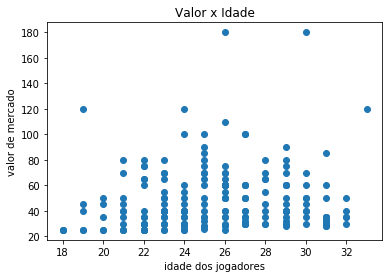

In [30]:
x = plt.scatter(dados_filtro['idade'], y )
plt.xlabel('idade dos jogadores')
plt.ylabel('valor de mercado')
plt.title('Valor x Idade')
plt.show(x)


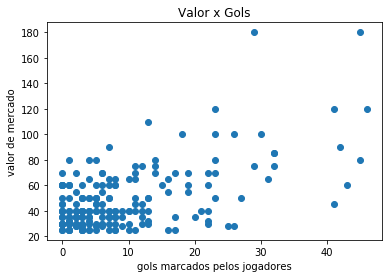

In [31]:
k = plt.scatter(dados_filtro['gols'], y )
plt.xlabel('gols marcados pelos jogadores')
plt.ylabel('valor de mercado')
plt.title('Valor x Gols')
plt.show(k)

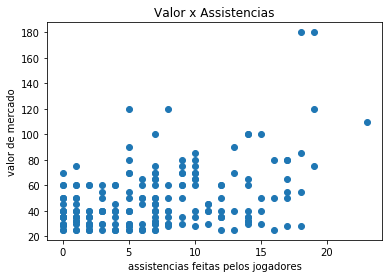

In [32]:
u = plt.scatter(dados_filtro['assistencias'] , y)
plt.xlabel('assistencias feitas pelos jogadores')
plt.ylabel('valor de mercado')
plt.title('Valor x Assistencias')
plt.show(u)

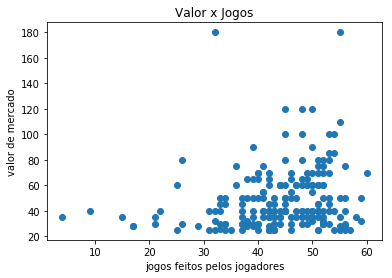

In [33]:
i = plt.scatter(dados_filtro['jogos'] , y)
plt.xlabel('jogos feitos pelos jogadores')
plt.ylabel('valor de mercado')
plt.title('Valor x Jogos')
plt.show(i)

___
## CONCLUSÃO

___
## REFERÊNCIAS BIBLIOGRÁFICAS